Supervised learning for classification



Here I introduce a dataset “Churn_Modeling.csv” from Kaggle “Bank Customer Churn Modeling” (https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling). Since I am sure that I am predicting a category “Exited” and “Stay” with value 1 and 0 in the exited column, it is a supervised learning for classification problem.

This file is the related code according to the final report

**Table of content:**


# 1. Introduction

## 1.1 Performance Criteria

library to be used:

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
import seaborn as sns

Performance model from confusion matrix: [relavent resource](
https://www.geeksforgeeks.org/confusion-matrix-machine-learning/)

*Note that here the acc_rate should be the same as modelfit.score*

In [2]:
from sklearn.metrics import confusion_matrix 
def acc_recall_precision_rate(ypredict, true_y):
    cm=confusion_matrix(true_y,ypredict)
    acc_rate,recall_rate,precision_rate=0,0,0    
    if cm[1][1]/(cm[1][0]+cm[1][1])>0:      
        recall_rate=cm[1][1]/(cm[1][0]+cm[1][1])
    if (cm[1][1]+cm[0][0])/(cm[1][1]+cm[1][0]+cm[0][0]+cm[0][1])>0:
        acc_rate=(cm[1][1]+cm[0][0])/(cm[1][1]+cm[1][0]+cm[0][0]+cm[0][1])
    if cm[1][1]/(cm[0][1]+cm[1][1])>0:
        precision_rate=cm[1][1]/(cm[0][1]+cm[1][1]) 
    return acc_rate, recall_rate, precision_rate

#can do a doubel check with the score

In [3]:
# def acc_recall_precision_rate(ypredict, true_y):
#     cm=confusion_matrix(true_y,ypredict)  
#     try:  
#         recall_rate=cm[1][1]/(cm[1][0]+cm[1][1])
#     except Exception:
#         recall_rate=0
#     try:
#         acc_rate=(cm[1][1]+cm[0][0])/(cm[1][1]+cm[1][0]+cm[0][0]+cm[0][1])
#     except:
#         acc_rate=0
#     try:
#         precision_rate=cm[1][1]/(cm[0][1]+cm[1][1])
#     except:
#         precision_rate=0
 
#     return acc_rate, recall_rate, precision_rate

# 2. DataSet information

In [4]:
df_or=pd.read_csv('Churn_Modelling.csv')

In [5]:
df_or=df_or.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [6]:
print(df_or.shape)
df_or.head()

(10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#print all the columns
# for col in df.columns:
#     print(col)
for col in df_or:
    if len(df_or[col].unique()) <20:
        print(col+" "+str(df_or[col].unique()))

    else:
        print(col)


CreditScore
Geography ['France' 'Spain' 'Germany']
Gender ['Female' 'Male']
Age
Tenure [ 2  1  8  7  4  6  3 10  5  9  0]
Balance
NumOfProducts [1 3 2 4]
HasCrCard [1 0]
IsActiveMember [1 0]
EstimatedSalary
Exited [1 0]


In [8]:
#describe data
print(df_or.dtypes)
df_or.describe()

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
#Imbalanced data
print(df_or["Exited"].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


## 2.1. colums info

col_0      percentage
Geography            
France          50.14
Germany         25.09
Spain           24.77
col_0   percentage
Gender            
Female       45.43
Male         54.57
col_0   percentage
Tenure            
0             4.13
1            10.35
2            10.48
3            10.09
4             9.89
5            10.12
6             9.67
7            10.28
8            10.25
9             9.84
10            4.90
col_0          percentage
NumOfProducts            
1                   50.84
2                   45.90
3                    2.66
4                    0.60
col_0      percentage
HasCrCard            
0               29.45
1               70.55
col_0           percentage
IsActiveMember            
0                    48.49
1                    51.51
col_0   percentage
Exited            
0            79.63
1            20.37


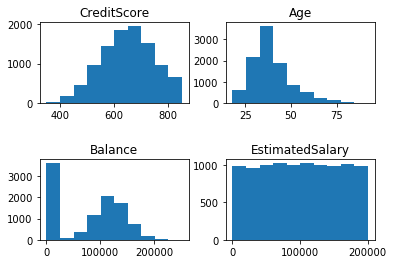

In [10]:
#percentage and distribution of the data

for col in df_or:
    if len(df_or[col].unique()) <20:
        print(pd.crosstab(df_or[col],"percentage")/100)
r=1        
for col in df_or:
    if len(df_or[col].unique()) >20:
        plt.subplot(2,2,r)
        plt.subplots_adjust(hspace=.7,wspace=.25)
        plt.hist(df_or[col])
        plt.title(col)
        r+=1

## 2.2. columns comparison

the average of the exited clients: let's look more into detail
* older 
* less an active member
* higher in estimated salary

There are many outliers in age, but the medium, and 1,3rd quantile are still relatively higher then not exited, that we can still stay generally people who exited are older.

on the other hand for the extimated salary, on the boxplot we cannot really say it is related to the exited factors

People from Germany might be more likely to leave, you have 3 or 4 products are most likely to exit

In [11]:
#all the data compare to exited
df_or.groupby(['Exited']).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


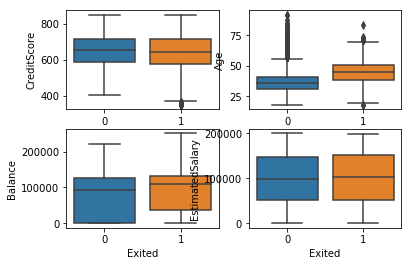

In [12]:
#plot relationship with numerical
r=1
for col in df_or:
    if len(df_or[col].unique()) >20:
        plt.subplot(2,2,r)
        sns.boxplot(x='Exited',y=col,data=df_or)
        r+=1

In [13]:
#plot categorical percentage
for col in df_or:
    if len(df_or[col].unique()) <20:
        print(pd.crosstab(df_or['Exited'],df_or[col]).apply(lambda x: x/x.sum()*100))
#c_count=df.groupby("Geography")["Exited"].value_counts()

Geography     France    Germany      Spain
Exited                                    
0          83.845233  67.556796  83.326605
1          16.154767  32.443204  16.673395
Gender     Female       Male
Exited                      
0       74.928461  83.544072
1       25.071539  16.455928
Tenure         0          1          2         3          4          5   \
Exited                                                                    
0       76.997579  77.584541  80.820611  78.88999  79.474216  79.347826   
1       23.002421  22.415459  19.179389  21.11001  20.525784  20.652174   

Tenure         6          7          8          9          10  
Exited                                                         
0       79.731127  82.782101  80.780488  78.353659  79.387755  
1       20.268873  17.217899  19.219512  21.646341  20.612245  
NumOfProducts          1          2          3      4
Exited                                               
0              72.285602  92.418301  17.293233 

# 3.Preprocessing
## 3.1. Grouping the data

For Tenue and NumOfProducts

In [14]:
#copy the transform data from original
df_group=df_or.copy()
df_non_group=df_or.copy()

In [15]:
print("before grouping")
#make sure we transform it right
print(pd.crosstab(df_group['Tenure'],"percentage")/10000)
print(pd.crosstab(df_group['NumOfProducts'],"percentage")/10000)

before grouping
col_0   percentage
Tenure            
0           0.0413
1           0.1035
2           0.1048
3           0.1009
4           0.0989
5           0.1012
6           0.0967
7           0.1028
8           0.1025
9           0.0984
10          0.0490
col_0          percentage
NumOfProducts            
1                  0.5084
2                  0.4590
3                  0.0266
4                  0.0060


In [16]:
#Tenure
Tenure=list(df_group['Tenure'])
for i in range(len(Tenure)):
    if Tenure[i] in (0,1):
        Tenure[i]="T1 Class"
    elif Tenure[i] in (2,3,4):
        Tenure[i]="T2 Class"
    elif Tenure[i] in (5,6,7):
        Tenure[i]="T3 Class"
    else:
        Tenure[i]="T4 Class"

df_group['Tenure']=Tenure
print(df_group['Tenure'].unique())

#NumOfProducts
NumOfProducts=list(df_group['NumOfProducts'])
for i in range(len(NumOfProducts)):
    if NumOfProducts[i] in (3,4):
        NumOfProducts[i]="3More products"
    elif NumOfProducts[i]==1:
        NumOfProducts[i]="1OneProduct"
    elif NumOfProducts[i]==2:
        NumOfProducts[i]="2TwoProduct"
df_group['NumOfProducts']=NumOfProducts
print(df_group['NumOfProducts'].unique())

['T2 Class' 'T1 Class' 'T4 Class' 'T3 Class']
['1OneProduct' '3More products' '2TwoProduct']


In [17]:
print("aftergrouping")
print(pd.crosstab(df_group['Tenure'],"percentage")/10000)
print(pd.crosstab(df_group['NumOfProducts'],"percentage")/10000)

aftergrouping
col_0     percentage
Tenure              
T1 Class      0.1448
T2 Class      0.3046
T3 Class      0.3007
T4 Class      0.2499
col_0           percentage
NumOfProducts             
1OneProduct         0.5084
2TwoProduct         0.4590
3More products      0.0326


## 3.2 Data encoding for group and non-group data

In [18]:
#encoding
from sklearn.preprocessing import LabelEncoder
#spliting
from sklearn.model_selection import train_test_split

### onehot
#### For group data:

In [19]:
#for group data
gendummy=pd.get_dummies(df_group["Gender"])
geodummy=pd.get_dummies(df_group["Geography"])
tenuredummy=pd.get_dummies(df_group["Tenure"])
productdummy=pd.get_dummies(df_group["NumOfProducts"])

In [20]:
onehotdf_group=df_group.join(gendummy).join(geodummy).join(tenuredummy).join(productdummy)
onehotdf_group=onehotdf_group.drop(['Geography','Gender','Tenure','NumOfProducts','Female'],axis=1)
onehotdf_group.head()

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,France,Germany,Spain,T1 Class,T2 Class,T3 Class,T4 Class,1OneProduct,2TwoProduct,3More products
0,619,42,0.00,1,1,101348.88,1,0,1,0,0,0,1,0,0,1,0,0
1,608,41,83807.86,0,1,112542.58,0,0,0,0,1,1,0,0,0,1,0,0
2,502,42,159660.80,1,0,113931.57,1,0,1,0,0,0,0,0,1,0,0,1
3,699,39,0.00,0,0,93826.63,0,0,1,0,0,1,0,0,0,0,1,0
4,850,43,125510.82,1,1,79084.10,0,0,0,0,1,0,1,0,0,1,0,0


In [21]:
#now we split the data
onehot_groupx=onehotdf_group.drop("Exited",axis=1)
onehot_groupy=onehotdf_group["Exited"]
# split to train and (validation+test) set
onehot_groupx_train, onehot_groupx_valitest, onehot_groupy_train, onehot_groupy_valitest=train_test_split(onehot_groupx,onehot_groupy,test_size=0.3,random_state=123)
#split to validation and test set
onehot_groupx_validation, onehot_groupx_test, onehot_groupy_validation, onehot_groupy_test=train_test_split(onehot_groupx_valitest,onehot_groupy_valitest,test_size=0.5,random_state=123)

#### For non-group data:

In [22]:
Tenure=list(df_non_group['Tenure'])
NumOfProducts=list(df_non_group['NumOfProducts'])
for i in range(df_non_group.shape[0]):
    Tenure[i]=str(df_non_group['Tenure'][i])+"T"
    NumOfProducts[i]=str(df_non_group['NumOfProducts'][i])+"NP"
df_non_group['Tenure']=Tenure
df_non_group['NumOfProducts']=NumOfProducts


In [23]:
#for group data
gendummy=pd.get_dummies(df_non_group["Gender"])
geodummy=pd.get_dummies(df_non_group["Geography"])
tenuredummy=pd.get_dummies(df_non_group["Tenure"])
productdummy=pd.get_dummies(df_non_group["NumOfProducts"])

In [24]:
onehotdf_non_group=df_non_group.join(gendummy).join(geodummy).join(tenuredummy).join(productdummy)
onehotdf_non_group=onehotdf_non_group.drop(['Geography','Gender','Tenure','NumOfProducts','Female'],axis=1)
onehotdf_non_group.head()

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,France,Germany,...,4T,5T,6T,7T,8T,9T,1NP,2NP,3NP,4NP
0,619,42,0.00,1,1,101348.88,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,608,41,83807.86,0,1,112542.58,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,502,42,159660.80,1,0,113931.57,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,699,39,0.00,0,0,93826.63,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,850,43,125510.82,1,1,79084.10,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
#now we split the data
onehot_non_groupx=onehotdf_non_group.drop("Exited",axis=1)
onehot_non_groupy=onehotdf_non_group["Exited"]
# split to train and (validation+test) set
onehot_non_groupx_train, onehot_non_groupx_valitest, onehot_non_groupy_train, onehot_non_groupy_valitest=train_test_split(onehot_non_groupx,onehot_non_groupy,test_size=0.3,random_state=123)
#split to validation and test set
onehot_non_groupx_validation, onehot_non_groupx_test, onehot_non_groupy_validation, onehot_non_groupy_test=train_test_split(onehot_non_groupx_valitest,onehot_non_groupy_valitest,test_size=0.5,random_state=123)

#### Make sure the size and distribution of the data

One Hot
Non Group train x:
(7000, 25)


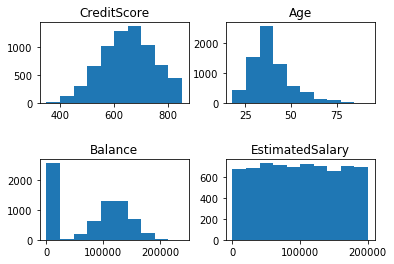

Group train x:
(7000, 17)


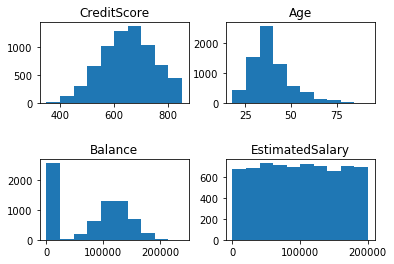

In [26]:
print("One Hot")
print("Non Group train x:")
print(onehot_non_groupx_train.shape)
# for col in onehot_non_groupx_train:
#     if len(onehot_non_groupx_train[col].unique()) <20:
#         print(pd.crosstab(onehot_non_groupx_train[col],"percentage")/100)
r=1        
for col in onehot_non_groupx_train:
    if len(onehot_non_groupx_train[col].unique()) >20:
        plt.subplot(2,2,r)
        plt.subplots_adjust(hspace=.7,wspace=.25)
        plt.hist(onehot_non_groupx_train[col])
        plt.title(col)
        r+=1
plt.show()

print("Group train x:")
print(onehot_groupx_train.shape)

r=1        
for col in onehot_groupx_train:
    if len(onehot_groupx_train[col].unique()) >20:
        plt.subplot(2,2,r)
        plt.subplots_adjust(hspace=.7,wspace=.25)
        plt.hist(onehot_groupx_train[col])
        plt.title(col)
        r+=1
plt.show()

### label

#### For group data

In [27]:
# df_group
labelencoder=LabelEncoder()
labeldf_group=df_group.copy()
labeldf_group['Gender']=labelencoder.fit_transform(labeldf_group['Gender'])
labeldf_group['Geography']=labelencoder.fit_transform(labeldf_group['Geography'])
labeldf_group['NumOfProducts']=labelencoder.fit_transform(labeldf_group['NumOfProducts'])
labeldf_group['Tenure']=labelencoder.fit_transform(labeldf_group['Tenure'])
labeldf_group.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,1,0.00,0,1,1,101348.88,1
1,608,2,0,41,0,83807.86,0,0,1,112542.58,0
2,502,0,0,42,3,159660.80,2,1,0,113931.57,1
3,699,0,0,39,0,0.00,1,0,0,93826.63,0
4,850,2,0,43,1,125510.82,0,1,1,79084.10,0


In [28]:
#now we split the data
label_groupx=labeldf_group.iloc[:,:-1]
label_groupy=labeldf_group.iloc[:,-1]
# split to train and (validation+test) set
label_groupx_train, label_groupx_valitest, label_groupy_train, label_groupy_valitest=train_test_split(label_groupx,label_groupy,test_size=0.3,random_state=123)
#split to validation and test set
label_groupx_validation, label_groupx_test, label_groupy_validation, label_groupy_test=train_test_split(label_groupx_valitest,label_groupy_valitest,test_size=0.5,random_state=123)

Transformation(group):
* Geography: (France, Germany, Spain) to (0,1,2)
* Gender: (Female, Male) to (0,1)
* Tenure: class(T1,T2,T3,T4) to (0,1,2,3)
* NumOfProducts: (OneProducts,TwoProducts, MoreProducts) to (0,1,2)

#### For non-group data

In [29]:
# df_non_group (but here we use the original df)
labelencoder=LabelEncoder()
labeldf_non_group=df_or.copy()
labeldf_non_group['Gender']=labelencoder.fit_transform(labeldf_non_group['Gender'])
labeldf_non_group['Geography']=labelencoder.fit_transform(labeldf_non_group['Geography'])
labeldf_non_group.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [30]:
#now we split the data
label_non_groupx=labeldf_non_group.iloc[:,:-1]
label_non_groupy=labeldf_non_group.iloc[:,-1]
# split to train and (validation+test) set
label_non_groupx_train, label_non_groupx_valitest, label_non_groupy_train, label_non_groupy_valitest=train_test_split(label_non_groupx,label_non_groupy,test_size=0.3,random_state=123)
#split to validation and test set
label_non_groupx_validation, label_non_groupx_test, label_non_groupy_validation, label_non_groupy_test=train_test_split(label_non_groupx_valitest,label_non_groupy_valitest,test_size=0.5,random_state=123)

Transformation(non-group):
* Geography: (France, Germany, Spain) to (0,1,2)
* Gender: (Female, Male) to (0,1)

#### Make sure the size and distribution of the data

Label
Non Group train x:
(7000, 10)


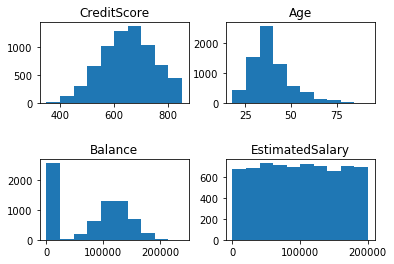

Group train x:
(7000, 10)


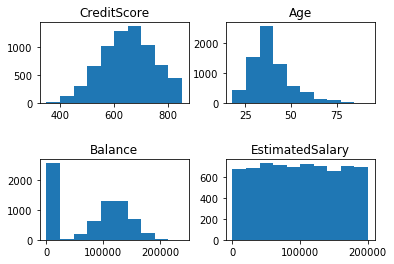

In [31]:
print("Label")
print("Non Group train x:")
print(label_non_groupx_train.shape)

r=1        
for col in label_non_groupx_train:
    if len(label_non_groupx_train[col].unique()) >20:
        plt.subplot(2,2,r)
        plt.subplots_adjust(hspace=.7,wspace=.25)
        plt.hist(label_non_groupx_train[col])
        plt.title(col)
        r+=1
plt.show()

print("Group train x:")
print(label_groupx_train.shape)

r=1        
for col in label_groupx_train:
    if len(label_groupx_train[col].unique()) >20:
        plt.subplot(2,2,r)
        plt.subplots_adjust(hspace=.7,wspace=.25)
        plt.hist(label_groupx_train[col])
        plt.title(col)
        r+=1
plt.show()

### Target

#### For group data

In [32]:
target_groupx=df_group.iloc[:,:-1]
target_groupy=df_group.iloc[:,-1]
# split to train and (validation+test) set
target_groupx_train, target_groupx_valitest, target_groupy_train, target_groupy_valitest=train_test_split(target_groupx,target_groupy,test_size=0.3,random_state=123)
#split to validation and test set
target_groupx_validation, target_groupx_test, target_groupy_validation, target_groupy_test=train_test_split(target_groupx_valitest,target_groupy_valitest,test_size=0.5,random_state=123)

In [33]:
target_groupx_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3144,648,Spain,Male,55,T1 Class,81370.07,1OneProduct,0,1,181534.04
9939,693,Spain,Female,57,T4 Class,0.00,2TwoProduct,1,1,135502.77
7925,586,Spain,Female,33,T3 Class,0.00,2TwoProduct,1,1,168261.40
309,438,Germany,Male,31,T4 Class,78398.69,1OneProduct,1,0,44937.01
9415,768,Germany,Female,43,T2 Class,129264.05,2TwoProduct,0,0,19150.14


In [34]:
for col in target_groupx_train:
    if len(target_groupx_train[col].unique())<20:
        percentage=pd.crosstab(target_groupx_train[col],"percent")/70
        after_list=list(percentage['percent'])
        before_list=list(percentage.index)
        target_groupx_train[col].replace(before_list,after_list, inplace=True)
        target_groupx_test[col].replace(before_list,after_list, inplace=True)
        target_groupx_validation[col].replace(before_list,after_list, inplace=True)

C:\Users\720S\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### For non-group data

In [35]:
target_non_groupx=df_non_group.iloc[:,:-1]
target_non_groupy=df_non_group.iloc[:,-1]
# split to train and (validation+test) set
target_non_groupx_train, target_non_groupx_valitest, target_non_groupy_train, target_non_groupy_valitest=train_test_split(target_non_groupx,target_non_groupy,test_size=0.3,random_state=123)
#split to validation and test set
target_non_groupx_validation, target_non_groupx_test, target_non_groupy_validation, target_non_groupy_test=train_test_split(target_non_groupx_valitest,target_non_groupy_valitest,test_size=0.5,random_state=123)

In [36]:
for col in target_non_groupx_train:
    if len(target_non_groupx_train[col].unique())<20:
        percentage=pd.crosstab(target_non_groupx_train[col],"percent")/70
        after_list=list(percentage['percent'])
        before_list=list(percentage.index)
        target_non_groupx_train[col].replace(before_list,after_list, inplace=True)
        target_non_groupx_test[col].replace(before_list,after_list, inplace=True)
        target_non_groupx_validation[col].replace(before_list,after_list, inplace=True)

C:\Users\720S\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### Make sure the size and distribution of the data

One Hot
Non Group train x:
(7000, 10)


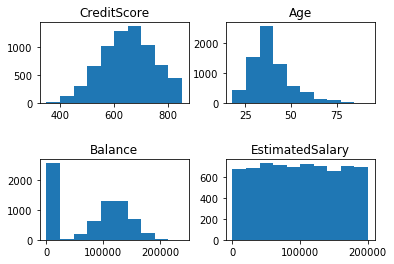

Group train x:
(7000, 10)


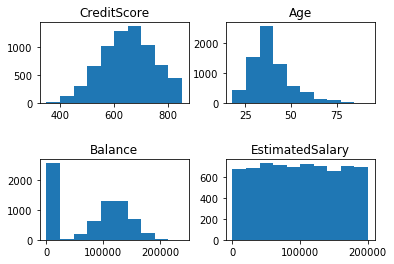

In [37]:
print("One Hot")
print("Non Group train x:")
print(target_non_groupx_train.shape)
# for col in onehot_non_groupx_train:
#     if len(onehot_non_groupx_train[col].unique()) <20:
#         print(pd.crosstab(onehot_non_groupx_train[col],"percentage")/100)
r=1        
for col in target_non_groupx_train:
    if len(target_non_groupx_train[col].unique()) >20:
        plt.subplot(2,2,r)
        plt.subplots_adjust(hspace=.7,wspace=.25)
        plt.hist(target_non_groupx_train[col])
        plt.title(col)
        r+=1
plt.show()

print("Group train x:")
print(target_groupx_train.shape)

r=1        
for col in target_groupx_train:
    if len(target_groupx_train[col].unique()) >20:
        plt.subplot(2,2,r)
        plt.subplots_adjust(hspace=.7,wspace=.25)
        plt.hist(target_groupx_train[col])
        plt.title(col)
        r+=1
plt.show()

## 3.3 Decision for grouping and encoder.

### Define training model performance function

In [38]:
#split
from sklearn.model_selection import cross_validate, cross_val_score
#performance
import time as time
from sklearn.model_selection import KFold
#model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [39]:
from keras.models import Sequential as Sequential
from keras.layers import Dense as Dense
import tensorflow as tf

Using TensorFlow backend.


In [40]:
def train_performance(model_dict,dataset_dict):
    for mkey,mvalue in model_dict.items():
        print(mkey)

        for dkey,dvalue in dataset_dict.items():    
            start=time.time()
            x=dvalue[0]
            y=dvalue[1]
            kf=KFold(n_splits=4, random_state=1234, shuffle=True)
            kf.get_n_splits(x)
            #spit the data in the training to 3 train_train, train_test sets
            acc_list=[]
            recall_list=[]
            precision_list=[]
            for train_index, test_index in kf.split(x):
                xtrain, xtest=x.iloc[train_index,:],x.iloc[test_index,:]
                ytrain, ytest=y.iloc[train_index],y.iloc[test_index]     
                fit=mvalue.fit(xtrain,ytrain)
                ypredict=fit.predict(xtest)
                perform_list=acc_recall_precision_rate(ypredict,ytest)
                acc_list.append(perform_list[0])
                recall_list.append(perform_list[1])
                precision_list.append(perform_list[2])
            print(dkey+" Avg Acc: "+str(round(st.mean(acc_list)*100,2)))
            print(dkey+" Avg Recall: "+str(round(st.mean(recall_list)*100,2)))
            print(dkey+" Avg percision: "+str(round(st.mean(precision_list)*100,2)))

            end=time.time()
            print('run time:'+str(end-start))

In [41]:
def simple_ann_performance(dataset_dict):
    print("ANN")
    H = 4 # number of nodes in the layer
    for dkey,dvalue in dataset_dict.items(): 
        print(dkey)
        start=time.time()

        x=dvalue[0]
        y=dvalue[1]
        kf=KFold(n_splits=3, random_state=123, shuffle=True)
        kf.get_n_splits(x)

        acc_list=[]
        recall_list=[]
        precision_list=[]
        for train_index, test_index in kf.split(x):
            xtrain, xtest=x.iloc[train_index,:],x.iloc[test_index,:]
            ytrain, ytest=y.iloc[train_index],y.iloc[test_index]  
            model = Sequential()
            #1 hidden layer
            model.add(Dense(output_dim = H, init = 'uniform', activation = 'relu', input_dim = xtrain.shape[1]))
            #the output layer
            model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
            #compile the model --> backpropagation -> gradient descent
            model.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])
            model.fit(xtrain,ytrain, batch_size=10, epochs=15, verbose=0) 

            ypredict=model.predict(xtest)
            ypredict=pd.DataFrame((ypredict>0.5)*1)
            perform_list=acc_recall_precision_rate(ypredict,ytest)
            acc_list.append(perform_list[0])
            recall_list.append(perform_list[1])
            precision_list.append(perform_list[2])
        print(dkey+" Avg Acc: "+str(round(st.mean(acc_list)*100,2)))
        print(dkey+" Avg Recall: "+str(round(st.mean(recall_list)*100,2)))
        print(dkey+" Avg percision: "+str(round(st.mean(precision_list)*100,2)))

        end=time.time()    
        print('run time:' +str(end-start))

In [42]:
#ANN with one hidden layer and 5 nodes in the layer
def simple_ann_performance_nokf(dataset_dict):
    print("ANN")
    H = 4 # number of nodes in the layer
    for dkey,dvalue in dataset_dict.items(): 
        print(dkey)
        xtrain, ytrain=dvalue[0],dvalue[1]
        start=time.time()
        model = Sequential()
        #1 hidden layer
        model.add(Dense(output_dim = H, init = 'uniform', activation = 'relu', input_dim = xtrain.shape[1]))
        #the output layer
        model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
        #compile the model --> backpropagation -> gradient descent
        model.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])
        model.fit(xtrain,ytrain, batch_size=10, epochs=15, verbose=0) 
        ypredict=model.predict(xtrain)
        ypredict=pd.DataFrame((ypredict>0.5)*1)
        perform_list=acc_recall_precision_rate(ypredict,ytrain)

        print(dkey+" Acc: "+str(round(perform_list[0]*100,2)))
        print(dkey+" Recall: "+str(round(perform_list[1]*100,2)))
        print(dkey+" percision: "+str(round(perform_list[2]*100,2)))

        end=time.time()    
        print('run time:' +str(end-start))


In [43]:
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras import models
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.regularizers import l2

### Check performance

In [44]:
LR=LogisticRegression(solver='lbfgs')
RF=RandomForestClassifier(n_estimators=100)
GB=GradientBoostingClassifier()

model={"LR":LR,"GB":GB,"RF":RF}
#model={"LR":LR}

dataset={"Group_onehot":[onehot_groupx_train,onehot_groupy_train],
         "Non_Group_onehot":[onehot_non_groupx_train,onehot_non_groupy_train],

         "Group_label":[label_groupx_train,label_groupy_train],
         "Non_Group_label":[label_non_groupx_train,label_non_groupy_train],

         "Group_target":[target_groupx_train,target_groupy_train],
         "Non_Group_target":[target_non_groupx_train,target_non_groupy_train]}


In [45]:
train_performance(model,dataset)

LR
Group_onehot Avg Acc: 79.07
Group_onehot Avg Recall: 6.5
Group_onehot Avg percision: 42.34
run time:0.24200177192687988
Non_Group_onehot Avg Acc: 79.07
Non_Group_onehot Avg Recall: 6.5
Non_Group_onehot Avg percision: 42.34
run time:0.23203754425048828
Group_label Avg Acc: 79.07
Group_label Avg Recall: 6.43
Group_label Avg percision: 42.32
run time:0.2130448818206787
Non_Group_label Avg Acc: 79.07
Non_Group_label Avg Recall: 6.5
Non_Group_label Avg percision: 42.34
run time:0.24738740921020508
Group_target Avg Acc: 80.39
Group_target Avg Recall: 16.98
Group_target Avg percision: 56.9
run time:0.2999544143676758
Non_Group_target Avg Acc: 80.43
Non_Group_target Avg Recall: 17.05
Non_Group_target Avg percision: 57.27
run time:0.36783266067504883
GB
Group_onehot Avg Acc: 86.0
Group_onehot Avg Recall: 45.93
Group_onehot Avg percision: 76.25
run time:2.872485637664795
Non_Group_onehot Avg Acc: 86.03
Non_Group_onehot Avg Recall: 45.44
Non_Group_onehot Avg percision: 76.82
run time:3.3197569

In [46]:
simple_ann_performance(dataset)

ANN
Group_onehot
Group_onehot Avg Acc: 79.54
Group_onehot Avg Recall: 0
Group_onehot Avg percision: 0
run time:30.904135942459106
Non_Group_onehot
Non_Group_onehot Avg Acc: 79.54
Non_Group_onehot Avg Recall: 0
Non_Group_onehot Avg percision: 0
run time:32.25857734680176
Group_label
Group_label Avg Acc: 79.54
Group_label Avg Recall: 0
Group_label Avg percision: 0
run time:34.15515327453613
Non_Group_label
Non_Group_label Avg Acc: 79.54
Non_Group_label Avg Recall: 0
Non_Group_label Avg percision: 0
run time:35.962289571762085
Group_target
Group_target Avg Acc: 79.54
Group_target Avg Recall: 0
Group_target Avg percision: 0
run time:39.42258667945862
Non_Group_target
Non_Group_target Avg Acc: 79.54
Non_Group_target Avg Recall: 0
Non_Group_target Avg percision: 0
run time:39.80488610267639


## 3.4. Choose scaler for the data

Here my dataset is grouped data and target data. But since it is well known that Onehot encoding work better for ANN model, I would also scale them to see the result.
* MinMaxScaler
* RobustScaler
* StandardScaler

[check detail](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

In [47]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [48]:
#1. MinMaxScaler
ms_onehot=MinMaxScaler().fit(onehot_groupx_train)
ms_target=MinMaxScaler().fit(target_groupx_train)
onehotx_train_ms=pd.DataFrame(ms_onehot.transform(onehot_groupx_train))
targetx_train_ms=pd.DataFrame(ms_target.transform(target_groupx_train))

#2. RobustScaler
rs_onehot=RobustScaler().fit(onehot_groupx_train)
rs_target=RobustScaler().fit(target_groupx_train)
onehotx_train_rs=pd.DataFrame(rs_onehot.transform(onehot_groupx_train))
targetx_train_rs=pd.DataFrame(rs_target.transform(target_groupx_train))

#3. StandardScaler
ss_onehot=StandardScaler().fit(onehot_groupx_train)
ss_target=StandardScaler().fit(target_groupx_train)
onehotx_train_ss=pd.DataFrame(ss_onehot.transform(onehot_groupx_train))
targetx_train_ss=pd.DataFrame(ss_target.transform(target_groupx_train))

In [49]:
LR=LogisticRegression(solver='lbfgs')
RF=RandomForestClassifier(n_estimators=100)
GB=GradientBoostingClassifier()
SVM=svm.SVC(gamma='auto')
model={"LR":LR,"GB":GB,"RF":RF}
dataset={"ms_onehot":[onehotx_train_ms,onehot_groupy_train],
         "ms_target":[targetx_train_ms,target_groupy_train],

         "rs_onehot":[onehotx_train_rs,onehot_groupy_train],
         "rs_target":[targetx_train_rs,target_groupy_train],

         "ss_onehot":[onehotx_train_ss,onehot_groupy_train],
         "ss_target":[targetx_train_ss,target_groupy_train]}


In [50]:
train_performance(model,dataset)

LR
ms_onehot Avg Acc: 83.51
ms_onehot Avg Recall: 34.35
ms_onehot Avg percision: 69.7
run time:0.21296358108520508
ms_target Avg Acc: 82.39
ms_target Avg Recall: 23.94
ms_target Avg percision: 70.51
run time:0.11807703971862793
rs_onehot Avg Acc: 83.53
rs_onehot Avg Recall: 35.61
rs_onehot Avg percision: 68.88
run time:0.1431891918182373
rs_target Avg Acc: 82.26
rs_target Avg Recall: 25.08
rs_target Avg percision: 68.19
run time:0.13282561302185059
ss_onehot Avg Acc: 83.51
ss_onehot Avg Recall: 35.67
ss_onehot Avg percision: 68.74
run time:0.12913155555725098
ss_target Avg Acc: 82.24
ss_target Avg Recall: 25.08
ss_target Avg percision: 68.07
run time:0.0962216854095459
GB
ms_onehot Avg Acc: 86.0
ms_onehot Avg Recall: 45.93
ms_onehot Avg percision: 76.25
run time:3.091111421585083
ms_target Avg Acc: 86.07
ms_target Avg Recall: 45.37
ms_target Avg percision: 77.13
run time:2.4345929622650146
rs_onehot Avg Acc: 86.01
rs_onehot Avg Recall: 45.93
rs_onehot Avg percision: 76.35
run time:3.19

In [51]:
simple_ann_performance(dataset)

ANN
ms_onehot
ms_onehot Avg Acc: 83.3
ms_onehot Avg Recall: 33.76
ms_onehot Avg percision: 69.01
run time:41.67766261100769
ms_target
ms_target Avg Acc: 82.09
ms_target Avg Recall: 20.21
ms_target Avg percision: 72.7
run time:44.3552143573761
rs_onehot
rs_onehot Avg Acc: 84.93
rs_onehot Avg Recall: 39.38
rs_onehot Avg percision: 75.2
run time:47.81831765174866
rs_target
rs_target Avg Acc: 82.64
rs_target Avg Recall: 21.22
rs_target Avg percision: 79.8
run time:50.24720239639282
ss_onehot
ss_onehot Avg Acc: 84.96
ss_onehot Avg Recall: 41.87
ss_onehot Avg percision: 73.84
run time:54.890788316726685
ss_target
ss_target Avg Acc: 84.14
ss_target Avg Recall: 31.09
ss_target Avg percision: 78.32
run time:55.26987409591675


CreditScore


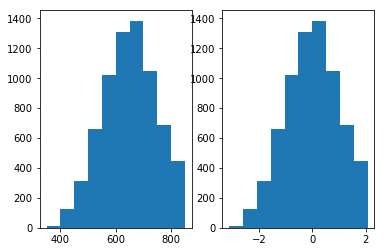

Age


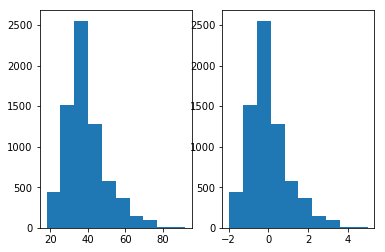

Balance


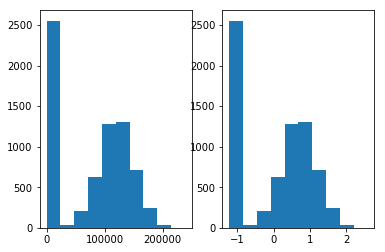

HasCrCard


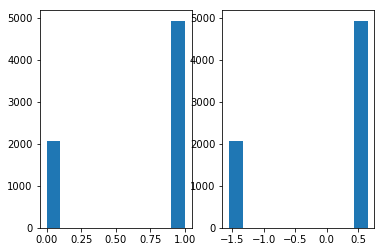

IsActiveMember


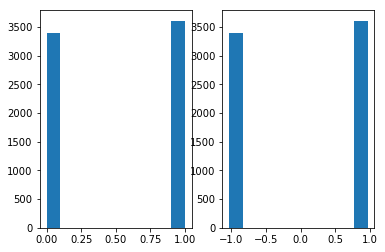

EstimatedSalary


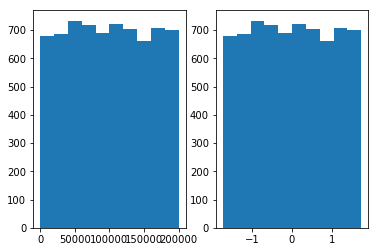

Male


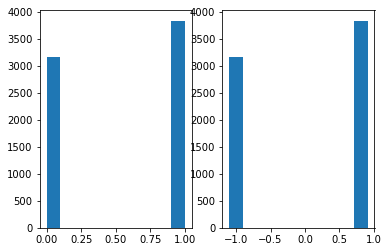

France


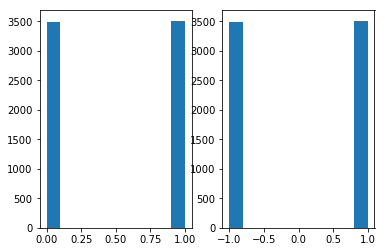

Germany


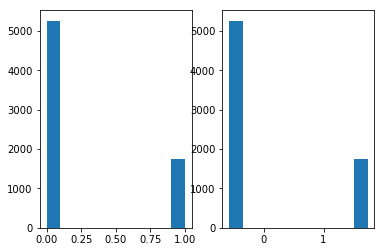

Spain


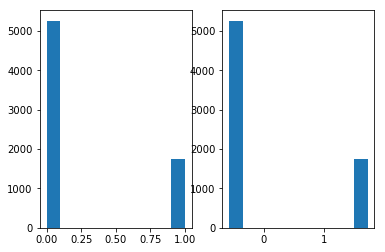

T1 Class


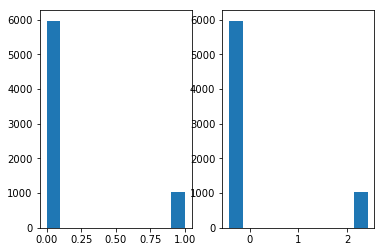

T2 Class


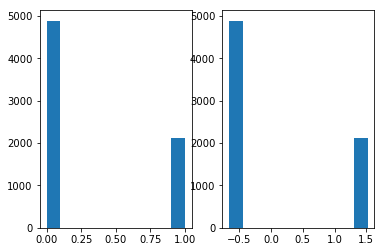

T3 Class


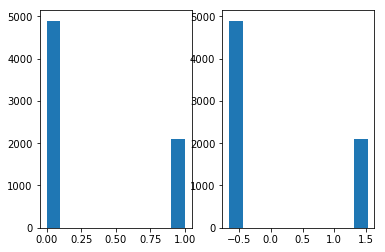

T4 Class


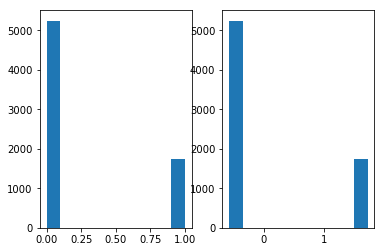

1OneProduct


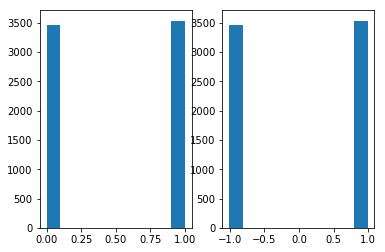

2TwoProduct


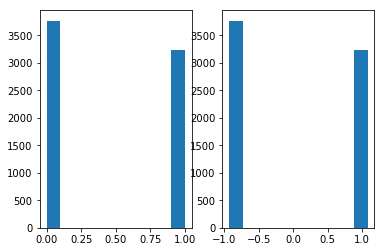

3More products


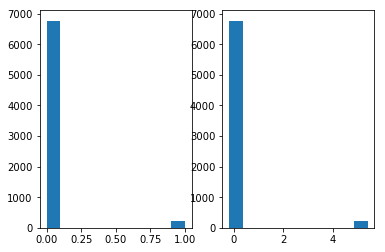

In [52]:
#make sure the distributions stays the same for onehot ss
for i in range(onehotx_train_ss.shape[1]):
    r=1
    print(onehot_groupx_train.columns[i])
    for t in [onehot_groupx_train,onehotx_train_ss]:
        plt.subplot(1,2,r)
        plt.hist(t.iloc[:,i])
        r+=1
    plt.show()

## 3.5 Final Data set

* grouped
* one hot
* standard Scaler

In [53]:
x_train=onehotx_train_ss.copy()
y_train=onehot_groupy_train.copy()
x_validation=pd.DataFrame(ss_onehot.transform(onehot_groupx_validation))
y_validation=onehot_groupy_validation.copy()
x_test=pd.DataFrame(ss_onehot.transform(onehot_groupx_test))
y_test=onehot_groupy_test.copy()

Make sure the columns correlations:

In [54]:
x_train.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.011537,0.012252,-0.002035,0.026642,-0.002331,-0.008184,-0.015349,0.021119,-0.003370,-0.004348,0.002380,-0.002724,0.003910,-0.014175,0.014580,-0.001013
1,0.011537,1.000000,0.030800,0.005244,0.087281,-0.009601,-0.033130,-0.043492,0.049502,0.000785,0.006125,-0.000606,0.004724,-0.009356,0.067798,-0.095786,0.077410
2,0.012252,0.030800,1.000000,-0.007931,-0.005336,0.017785,0.010209,-0.232733,0.407074,-0.137926,0.020660,-0.009809,-0.009807,0.003909,0.352133,-0.353443,0.000849
3,-0.002035,0.005244,-0.007931,1.000000,-0.009708,-0.005041,-0.000572,-0.003425,0.016986,-0.013020,-0.029923,0.014629,-0.010682,0.020226,0.002517,-0.002110,-0.001154
4,0.026642,0.087281,-0.005336,-0.009708,1.000000,-0.003019,0.017177,0.002468,-0.013976,0.011118,0.024503,-0.005479,0.010476,-0.025277,-0.021737,0.031859,-0.028018
5,-0.002331,-0.009601,0.017785,-0.005041,-0.003019,1.000000,-0.007031,-0.003206,0.014957,-0.011246,0.009613,-0.024040,0.001361,0.016178,-0.009276,0.001170,0.022651
6,-0.008184,-0.033130,0.010209,-0.000572,0.017177,-0.007031,1.000000,0.010292,-0.025498,0.013593,-0.011206,-0.003138,-0.000742,0.013252,0.010840,0.005270,-0.044953
7,-0.015349,-0.043492,-0.232733,-0.003425,0.002468,-0.003206,0.010292,1.000000,-0.577788,-0.578230,0.002618,0.006770,0.008964,-0.018793,-0.004034,0.017454,-0.037345
8,0.021119,0.049502,0.407074,0.016986,-0.013976,0.014957,-0.025498,-0.577788,1.000000,-0.331811,-0.004179,-0.005136,-0.009648,0.019059,0.026452,-0.044572,0.050256
9,-0.003370,0.000785,-0.137926,-0.013020,0.011118,-0.011246,0.013593,-0.578230,-0.331811,1.000000,0.001151,-0.002691,-0.000717,0.002669,-0.021780,0.024382,-0.007073


# 4. Model Paramter tunning

In [55]:
from sklearn.model_selection import GridSearchCV

## 4.1 Logistic regretion

For LR best parameters different from defaut is
* 'multi_class': 'ovr'
* 'penalty': 'l1'
* 'solver': 'liblinear'
slight improvement in performance

In [56]:
# #grid search
# param_grid={'penalty': ('l1','l2','elasticnet'),
#            'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
#            'multi_class':('ovr','multinomial')}

# LR=LogisticRegression()

# LR_cv=GridSearchCV(LR,param_grid,cv=4,error_score=np.nan)

# LR_cv.fit(x_train,y_train)

In [57]:
# print(LR_cv.best_params_)
# print(LR_cv.best_score_)


In [58]:
old_LR=LogisticRegression(solver='lbfgs')
new_LR=LogisticRegression(multi_class='ovr',solver='liblinear',penalty='l1')
model={"old_LR":old_LR,"new_LR":new_LR}
dataset={'Train':[x_train,y_train]}

In [59]:
train_performance(model,dataset)

old_LR
Train Avg Acc: 83.51
Train Avg Recall: 35.67
Train Avg percision: 68.74
run time:0.12407302856445312
new_LR
Train Avg Acc: 83.53
Train Avg Recall: 35.68
Train Avg percision: 68.85
run time:1.0211296081542969


## 4.2 SVM

from [svm documentation](https://scikit-learn.org/stable/modules/svm.html) there are 3 method to use for SVM classifivation

* sklearn.svm.SVC
* sklearn.svm.NuSVC : specified nu is infeasible
* sklearn.svm.LinearSVC


### A. SVC

- don't change the C: penalty parameter for error term
how much I don't want to get misclassified data. larger c get better training score (be careful for the overfitting)

- check 'tol':(1e-3,1e-4,1e-5) 

After the search I realize that the performance is better in the default option with

* kernel: 'rbf'
* decision_function_shape: 'ovr'
* C: 1
* tol: 1e-3

In [60]:
# #grid search
# param_grid={'degree': (1,2,3),
#            'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
#            'shrinking':(True,False),
#             'decision_function_shape':('ovr','ovo')}

# SVC_model=svm.SVC()

# SVC_cv=GridSearchCV(SVC_model,param_grid,cv=4,error_score=np.nan)

# SVC_cv.fit(x_train,y_train)

In [61]:
# print(SVC_cv.best_params_)
# print(SVC_cv.best_score_)

### B. LinearSVC

after checking the default setting seems to work the best.

{'fit_intercept': True, 'loss': 'squared_hinge', 'multi_class': 'ovr', 'penalty': 'l2'}

In [62]:
# #grid search

# param_grid={'penalty': ('l2','l1'),
#             'loss':('squared_hinge','hinge'),
#             'multi_class':('ovr','crammer_singer')}


# linSVC_model=svm.LinearSVC()
# linSVC_cv=GridSearchCV(linSVC_model,param_grid,cv=4,error_score=np.nan)
# linSVC_cv.fit(x_train,y_train)

In [63]:
# print(linSVC_cv.best_params_)
# print(linSVC_cv.best_score_)

## 4.3 GradientBoostingClassifier

default

* 'learning_rate': 0.1, 
* 'loss': 'deviance', 
* 'max_depth': 3, 
* 'max_features': None

In [64]:
# #grid search
# param_grid={'loss': ('deviance','exponential'),
#             'max_depth':(3,4,5),
#             'max_features':(None,int,float,"squrt","log2")}

# GB=GradientBoostingClassifier()
# GB_cv=GridSearchCV(GB,param_grid,cv=4,error_score=np.nan)
# GB_cv.fit(x_train,y_train)

In [65]:
# print(GB_cv.best_params_)
# print(GB_cv.best_score_)

In [66]:
old_GB=GradientBoostingClassifier()
new_GB=GradientBoostingClassifier(loss='exponential',max_depth=5,max_features= None)
model={"old":old_GB,"new":new_GB}
dataset={'Train':[x_train,y_train]}

In [67]:
train_performance(model,dataset)

old
Train Avg Acc: 86.0
Train Avg Recall: 45.93
Train Avg percision: 76.25
run time:3.498051881790161
new
Train Avg Acc: 85.8
Train Avg Recall: 46.85
Train Avg percision: 74.34
run time:6.210970163345337


## 4.4 RandomForestClassifier

* 'criterion': 'entropy', 

In [68]:
# #grid search
# param_grid={
#     'criterion':('gini','entropy'),
#     'max_features':("squrt",None,"log2",'auto'),
#     'class_weight':(None,'balanced','balanced_subsample')
# }

# RF=RandomForestClassifier()
# RF_cv=GridSearchCV(RF,param_grid,cv=4,error_score=np.nan)
# RF_cv.fit(x_train,y_train)

In [69]:
# print(RF_cv.best_params_)
# print(RF_cv.best_score_)

In [70]:
old_RF=RandomForestClassifier()
new_RF=RandomForestClassifier(criterion='entropy')
#new_RF=RandomForestClassifier(class_weight='balanced',criterion='entropy',max_features='log2')

model={"old":old_RF,"new":new_RF}
dataset={'Train':[x_train,y_train]}

In [71]:
train_performance(model,dataset)

old
Train Avg Acc: 85.14
Train Avg Recall: 43.52
Train Avg percision: 73.27
run time:0.44643068313598633
new
Train Avg Acc: 84.9
Train Avg Recall: 41.53
Train Avg percision: 73.09
run time:0.5735137462615967


## 4.5 KNeighborsCalssifier (KNN)

* leaf_size


{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.8255714285714286

In [72]:
# #grid search
# param_grid={
#     'n_neighbors':(5,4,3),
#     'weights':('uniform','distance'),
#     'algorithm':('auto','ball_tree','kd_tree','brute'),
#     'p':(1,2)#1:l1, 2:l2    
# }
# # param_grid={
# #     'leaf_size':range(31),
# #     'p':(1,2)#1:l1, 2:l2    
# # }
# KNN=KNeighborsClassifier()
# KNN_cv=GridSearchCV(KNN,param_grid,cv=3,error_score=np.nan)
# KNN_cv.fit(x_train,y_train)

In [73]:
# print(KNN_cv.best_params_)
# print(KNN_cv.best_score_)

In [74]:
old_KNN=KNeighborsClassifier()
new_KNN=KNeighborsClassifier(leaf_size=1,p=1)

model={"old":old_KNN,"new":new_KNN}

In [75]:
train_performance(model,dataset)

old
Train Avg Acc: 82.4
Train Avg Recall: 37.29
Train Avg percision: 61.51
run time:2.3196945190429688
new
Train Avg Acc: 82.51
Train Avg Recall: 37.69
Train Avg percision: 61.94
run time:3.5329084396362305


## 4.6 ANN

* H=12: The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.

one hidden: (17+1)*2/3=12

In [76]:
#0 standard
print("two hidden layer")

H=12
model = Sequential()
#1 hidden layer
model.add(Dense(H, activation = 'sigmoid', input_dim = x_train.shape[1]))
#the output layer
model.add(Dense(1, activation = 'sigmoid'))
#compile the model --> backpropagation -> gradient descent
model.compile(optimizer = 'Adam', loss = "binary_crossentropy", metrics = ['accuracy'])
model.fit(x_train,y_train, batch_size=10, epochs=15,verbose=0) 

ypredict=model.predict(x_train)
ypredict=pd.DataFrame((ypredict>0.5)*1)
perform_list=acc_recall_precision_rate(ypredict,y_train)

print(" Acc: "+str(round(perform_list[0]*100,2)))
print(" Recall: "+str(round(perform_list[1]*100,2)))
print(" percision: "+str(round(perform_list[2]*100,2)))


two hidden layer
 Acc: 85.44
 Recall: 44.34
 percision: 74.1


### 4.6.1 choose activation for both (input+hidden, output)

* A1: relu
* A2: sigmoid

In [77]:
activations=['sigmoid','tanh','relu','softmax','linear']
#activations=['sigmoid','tanh','relu']

In [78]:
# for i in range(len(activations)):
#     for j in range(len(activations)):
        
#         H=12
#         model = Sequential()
#         #1 hidden layer
#         model.add(Dense(H, activation = activations[i], input_dim = x_train.shape[1]))
#         #the output layer
#         model.add(Dense(1, activation = activations[j]))
#         #compile the model --> backpropagation -> gradient descent
#         model.compile(optimizer = 'Adam', loss = "binary_crossentropy", metrics = ['accuracy'])
#         model.fit(x_train,y_train, batch_size=10, epochs=15,verbose=0) 

#         ypredict=model.predict(x_train)
#         ypredict=pd.DataFrame((ypredict>0.5)*1)
#         perform_list=acc_recall_precision_rate(ypredict,y_train)
#         if perform_list[0]>.85 and perform_list[1] >.4 :
#             print("A1: ", activations[i])
#             print("A2: ", activations[j])
#             print(" Acc: "+str(round(perform_list[0]*100,2)))
#             print(" Recall: "+str(round(perform_list[1]*100,2)))
#             print(" percision: "+str(round(perform_list[2]*100,2)))
#             print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

### 4.6.2 choose optimizer (before output and output)


* optimizer: adam

In [79]:
##choose an optimizer
optimizer=['Adam','SGD','Adagrad','Adadelta','RMSprop']

In [80]:
# for i in range(len(optimizer)):
#     print(optimizer[i])
#     H=12
#     model = Sequential()
#     #1 hidden layer
#     model.add(Dense(H, activation = 'relu', input_dim = x_train.shape[1]))
#     #the output layer
#     model.add(Dense(1, activation = 'sigmoid'))
#     #compile the model --> backpropagation -> gradient descent
#     model.compile(optimizer = optimizer[i], loss = "binary_crossentropy", metrics = ['accuracy'])
#     model.fit(x_train,y_train, batch_size=10, epochs=15,verbose=0) 

#     ypredict=model.predict(x_train)
#     ypredict=pd.DataFrame((ypredict>0.5)*1)
#     perform_list=acc_recall_precision_rate(ypredict,y_train)

#     print("  Acc: "+str(round(perform_list[0]*100,2)))
#     print("  Recall: "+str(round(perform_list[1]*100,2)))
#     print("  percision: "+str(round(perform_list[2]*100,2)))
#     print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

### 4.6.3 choose a loss function
in compile stage: binary_crossentropy

In [81]:
#choose loss
losses=['binary_crossentropy','hinge','squared_hinge']
#binary_crossentropy

In [82]:
# for i in range(len(losses)):
#     print(losses[i])
#     H=12

#     model = Sequential()
#     #2 hidden layer
#     model.add(Dense(H, activation = 'relu', input_dim = x_train.shape[1]))
#     model.add(Dense(H, activation = 'relu'))
#     #the output layer
#     model.add(Dense(1, activation = 'sigmoid'))
#     #compile the model --> backpropagation -> gradient descent
#     model.compile(optimizer = 'Adam', loss = losses[i], metrics = ['accuracy'])
#     model.fit(x_train,y_train, batch_size=20, epochs=15,verbose=0) 

#     ypredict=model.predict(x_train)
#     ypredict=pd.DataFrame((ypredict>0.5)*1)
#     perform_list=acc_recall_precision_rate(ypredict,y_train)


#     print("  Acc: "+str(round(perform_list[0]*100,2)))
#     print("  Recall: "+str(round(perform_list[1]*100,2)))
#     print("  percision: "+str(round(perform_list[2]*100,2)))
#     print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

### 4.6.4 choose initializers for kernal and bias

2 hidden layer function better.

Default: kernel_initializer='glorot_uniform', bias_initializer='zeros'

* K: glorot_normal
* B: glorot_uniform

In [83]:
#choose kernel_initializer and bias_initializer
initializers=['glorot_normal','zeros','ones','glorot_uniform']

In [84]:
# #for kernel_initializer
# for i in range(len(initializers)):
#     H=12
#     model = Sequential()
#     #1 hidden layer
#     model.add(Dense(H, activation = 'relu', input_dim = x_train.shape[1],kernel_initializer=initializers[i]))

#     #the output layer
#     model.add(Dense(1, activation = 'sigmoid',kernel_initializer=initializers[i]))
#     #compile the model --> backpropagation -> gradient descent
#     model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#     model.fit(x_train,y_train, batch_size=20, epochs=15,verbose=0) 

#     ypredict=model.predict(x_train)
#     ypredict=pd.DataFrame((ypredict>0.5)*1)
#     perform_list=acc_recall_precision_rate(ypredict,y_train)
    
#     print(initializers[i])
#     print("  Acc: "+str(round(perform_list[0]*100,2)))
#     print("  Recall: "+str(round(perform_list[1]*100,2)))
#     print("  percision: "+str(round(perform_list[2]*100,2)))
#     print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

In [85]:
# # # #for bias_initializer
# for i in range(len(initializers)):
#     H=12
#     model = Sequential()
#     #1 hidden layer
#     model.add(Dense(H, activation = 'relu', input_dim = x_train.shape[1],bias_initializer=initializers[i],kernel_initializer='glorot_normal'))
#     #the output layer
#     model.add(Dense(1, activation = 'sigmoid',bias_initializer=initializers[i],kernel_initializer='glorot_normal'))
#     #compile the model --> backpropagation -> gradient descent
#     model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#     model.fit(x_train,y_train, batch_size=20, epochs=15,verbose=0) 

#     ypredict=model.predict(x_train)
#     ypredict=pd.DataFrame((ypredict>0.5)*1)
#     perform_list=acc_recall_precision_rate(ypredict,y_train)
    
#     if perform_list[0]>.84:
#         print(initializers[i])
#         print("  Acc: "+str(round(perform_list[0]*100,2)))
#         print("  Recall: "+str(round(perform_list[1]*100,2)))
#         #print("  percision: "+str(round(perform_list[2]*100,2)))
#         print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

### 4.6.5 One layer change batch_size and epochs

should only stick to 1 or 2 layer, over 2 would lead to overfitting

I decided to take (batch_size 32 and 20 epochs) with 2 layers

In [86]:
# print("one layer")
# # for batch in (27,32,64):

# start=time.time()
# H=12
# model = Sequential()
# model.add(Dense(H, activation = 'relu', input_dim = x_train.shape[1],bias_initializer='glorot_uniform',kernel_initializer='glorot_normal'))
# #the output layer
# model.add(Dense(1, activation = 'sigmoid',bias_initializer='glorot_uniform',kernel_initializer='glorot_normal'))
# #compile the model --> backpropagation -> gradient descent
# model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.fit(x_train,y_train, batch_size=32, epochs=20) 

# ypredict=model.predict(x_train)
# ypredict=pd.DataFrame((ypredict>0.5)*1)
# perform_list=acc_recall_precision_rate(ypredict,y_train)
# end=time.time()
# print("  Acc: "+str(round(perform_list[0]*100,2)))
# print("  Recall: "+str(round(perform_list[1]*100,2)))
# #print("  percision: "+str(round(perform_list[2]*100,2)))
# print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))
# print("run time: "+str(round(end-start,2)))


# print("test:")
# ypredict=model.predict(x_validation)
# ypredict=pd.DataFrame((ypredict>0.5)*1)
# perform_list=acc_recall_precision_rate(ypredict,y_validation)
# end=time.time()
# print("  Acc: "+str(round(perform_list[0]*100,2)))
# print("  Recall: "+str(round(perform_list[1]*100,2)))
# #print("  percision: "+str(round(perform_list[2]*100,2)))
# print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

In [87]:
# print("two layer")
# # for batch in (27,32,64):

# start=time.time()
# H=12
# model = Sequential()
# model.add(Dense(H, activation = 'relu', input_dim = x_train.shape[1],bias_initializer='glorot_uniform',kernel_initializer='glorot_normal'))
# model.add(Dense(H,activation = 'relu',bias_initializer='glorot_uniform',kernel_initializer='glorot_normal'))

# #the output layer
# model.add(Dense(1, activation = 'sigmoid',bias_initializer='glorot_uniform',kernel_initializer='glorot_normal'))
# #compile the model --> backpropagation -> gradient descent
# model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.fit(x_train,y_train, batch_size=32, epochs=20) 

# ypredict=model.predict(x_train)
# ypredict=pd.DataFrame((ypredict>0.5)*1)
# perform_list=acc_recall_precision_rate(ypredict,y_train)
# end=time.time()
# print("  Acc: "+str(round(perform_list[0]*100,2)))
# print("  Recall: "+str(round(perform_list[1]*100,2)))
# #print("  percision: "+str(round(perform_list[2]*100,2)))
# print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))
# print("run time: "+str(round(end-start,2)))


# print("test:")
# ypredict=model.predict(x_validation)
# ypredict=pd.DataFrame((ypredict>0.5)*1)
# perform_list=acc_recall_precision_rate(ypredict,y_validation)
# end=time.time()
# print("  Acc: "+str(round(perform_list[0]*100,2)))
# print("  Recall: "+str(round(perform_list[1]*100,2)))
# #print("  percision: "+str(round(perform_list[2]*100,2)))
# print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

# 5. Model Selection


In [88]:
from sklearn.model_selection import cross_val_predict
def validation_performance(fitted_model_dict,dataset_dict):
    for mkey,mvalue in fitted_model_dict.items():
        print(mkey)
        for dkey,dvalue in dataset_dict.items():    
            start=time.time()
            x=dvalue[0]#validation x
            y_true=dvalue[1]#validation y
            ypredict=cross_val_predict(mvalue, x, y_true, cv=4, verbose=0)
            perform_list=acc_recall_precision_rate(ypredict,y_true)

            print(dkey+" Acc: ",round(perform_list[0]*100,2))
            print(dkey+" Recall: ",round(perform_list[1]*100,2))
            print(dkey+" percision: ",round(perform_list[2]*100,2))
def ann_validation_performance(ANN_model,dataset_dict):
    acc=[]
    recall=[]
    precision=[]
    x=dataset_dict['validation'][0]
    y_true=dataset_dict['validation'][1]
    for i in range(5):
        y_predict=ANN_model.predict(x)
        y_predict=pd.DataFrame((y_predict>0.5)*1)
        perform_list=acc_recall_precision_rate(y_predict,y_true)
        acc.append(perform_list[0])
        recall.append(perform_list[1])
        precision.append(perform_list[2])
    print('ANN')
    print(" Avg Acc: ",round(st.mean(acc)*100,2))
    print(" Avg Recall: ",round(st.mean(recall)*100,2))
    print(" Avg Percision: ",round(st.mean(precision)*100,2))

In [89]:
#Logistic Regression
LR_fit=LogisticRegression(multi_class='ovr',solver='liblinear',penalty='l1').fit(x_train,y_train)
#SVM
SVC_fit=svm.SVC().fit(x_train,y_train)
LSVC_fit=svm.LinearSVC().fit(x_train,y_train)
#GradientBoosting
GB_fit=GradientBoostingClassifier(loss='exponential',max_depth=5,max_features= None).fit(x_train,y_train)
#RandomForest
RF_fit=RandomForestClassifier(criterion='entropy').fit(x_train,y_train)
#KNN
KNN_fit=KNeighborsClassifier(leaf_size=1,p=1).fit(x_train,y_train)


In [90]:
#ANN
H=12
ANN = Sequential()
ANN.add(Dense(H, activation = 'relu', input_dim = x_train.shape[1],bias_initializer='glorot_uniform',kernel_initializer='glorot_normal'))
ANN.add(Dense(H,activation = 'relu',bias_initializer='glorot_uniform',kernel_initializer='glorot_normal'))
ANN.add(Dense(1, activation = 'sigmoid',bias_initializer='glorot_uniform',kernel_initializer='glorot_normal'))
ANN.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ANN.fit(x_train,y_train, batch_size=32, epochs=20,verbose=0) 

In [91]:
fit_model={'LR':LR_fit,'SVC':SVC_fit, 'LSVC':LSVC_fit,'GB':GB_fit,'KNN':KNN_fit}
val_data={'validation':[x_validation,y_validation]}
#validation_performance

In [92]:
validation_performance(fit_model,val_data)

LR
validation Acc:  84.53
validation Recall:  42.44
validation percision:  71.35
SVC
validation Acc:  84.27
validation Recall:  36.01
validation percision:  75.17
LSVC
validation Acc:  84.33
validation Recall:  36.98
validation percision:  74.68
GB
validation Acc:  84.33
validation Recall:  46.62
validation percision:  67.76
KNN
validation Acc:  82.93
validation Recall:  39.23
validation percision:  64.55


In [93]:
ann_validation_performance(ANN,val_data)

ANN
 Avg Acc:  86.67
 Avg Recall:  47.91
 Avg Percision:  79.68


**Eventually I see that my ANN model perform much better, but the recall rate is still quite low, maybe due to the fact that my data is imbalance. I can try to use simple oversample approach.**

# 6. Oversample the data 

In [95]:
from imblearn.over_sampling import SMOTE 

In [96]:
sm = SMOTE(random_state=1234)
o_g_x_res, o_g_y_res = sm.fit_resample(onehot_groupx, onehot_groupy)

# split to train and (validation+test) set
r_x_train, r_x_valitest, r_y_train, r_y_valitest=train_test_split(o_g_x_res,o_g_y_res,test_size=0.3,random_state=123)
#split to validation and test set
r_x_validation, r_x_test, r_y_validation, r_y_test=train_test_split(r_x_valitest,r_y_valitest,test_size=0.5,random_state=123)

ss=StandardScaler().fit(r_x_train,r_y_train)
re_x_train=pd.DataFrame(ss.transform(r_x_train))
re_y_train=pd.DataFrame(r_y_train.copy())

re_x_validation=pd.DataFrame(ss.transform(r_x_validation))
re_y_validation=pd.DataFrame(r_y_validation.copy())

re_x_test=pd.DataFrame(ss.transform(r_x_test))
re_y_test=pd.DataFrame(r_y_test.copy())

In [97]:
#Logistic Regression
LR_fit=LogisticRegression(multi_class='ovr',solver='liblinear',penalty='l1').fit(re_x_train,re_y_train)
#SVM
SVC_fit=svm.SVC().fit(re_x_train,re_y_train)
LSVC_fit=svm.LinearSVC().fit(re_x_train,re_y_train)
#GradientBoosting
GB_fit=GradientBoostingClassifier(loss='exponential',max_depth=5,max_features= None).fit(re_x_train,re_y_train)
#RandomForest
RF_fit=RandomForestClassifier(criterion='entropy').fit(re_x_train,re_y_train)
#KNN
KNN_fit=KNeighborsClassifier(leaf_size=1,p=1).fit(re_x_train,re_y_train)


In [98]:
#ANN
H=12
ANN = Sequential()
ANN.add(Dense(H, activation = 'relu', input_dim = x_train.shape[1],bias_initializer='glorot_uniform',kernel_initializer='glorot_normal'))
ANN.add(Dense(H,activation = 'relu',bias_initializer='glorot_uniform',kernel_initializer='glorot_normal'))
ANN.add(Dense(1, activation = 'sigmoid',bias_initializer='glorot_uniform',kernel_initializer='glorot_normal'))
ANN.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ANN.fit(re_x_train,re_y_train, batch_size=32, epochs=20,verbose=0) 

In [99]:
fit_model={'LR':LR_fit,'SVC':SVC_fit, 'LSVC':LSVC_fit,'GB':GB_fit,'KNN':KNN_fit}
val_data={'validation':[re_x_validation,re_y_validation]}
#validation_performance

In [100]:
validation_performance(fit_model,val_data)

LR
validation Acc:  77.98
validation Recall:  78.07
validation percision:  78.07
SVC
validation Acc:  85.18
validation Recall:  82.15
validation percision:  87.56
LSVC
validation Acc:  78.02
validation Recall:  78.57
validation percision:  77.85
GB
validation Acc:  89.49
validation Recall:  86.91
validation percision:  91.73
KNN
validation Acc:  78.95
validation Recall:  70.39
validation percision:  85.08


In [101]:
ann_validation_performance(ANN,val_data)

ANN
 Avg Acc:  85.35
 Avg Recall:  83.74
 Avg Percision:  86.63


ANN improve a lot, other accuracy reduce but the recall rate all improve!

maybe we can re perform the parameter selection for all methods

## 6.1 retune LR

In [102]:
# #LR
# #grid search
# param_grid={'penalty': ('l1','l2','elasticnet'),
#            'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
#            'multi_class':('ovr','multinomial')}
# LR=LogisticRegression()
# LR_cv=GridSearchCV(LR,param_grid,cv=4,error_score=np.nan)
# LR_cv.fit(re_x_train,re_y_train)
# print(LR_cv.best_params_)
# print(LR_cv.best_score_)

In [103]:
old_LR=LogisticRegression(multi_class='ovr',solver='liblinear',penalty='l1')
new_LR=LogisticRegression(multi_class='ovr',solver='liblinear',penalty='l2')
model={"old_LR":old_LR,"new_LR":new_LR}
dataset={'Train':[re_x_train,re_y_train]}
train_performance(model,dataset)

old_LR
Train Avg Acc: 77.23
Train Avg Recall: 76.7
Train Avg percision: 77.65
run time:3.0152206420898438
new_LR
Train Avg Acc: 77.25
Train Avg Recall: 76.74
Train Avg percision: 77.66
run time:0.16100382804870605


## 6.2 retune SVC

In [104]:
# #grid search
# param_grid={'degree': (1,2,3),
#            'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
#            'shrinking':(True,False),
#             'decision_function_shape':('ovr','ovo')}

# SVC_model=svm.SVC()
# SVC_cv=GridSearchCV(SVC_model,param_grid,cv=4,error_score=np.nan)
# SVC_cv.fit(re_x_train,re_y_train)
# print(SVC_cv.best_params_)
# print(SVC_cv.best_score_)

## 6.3 retune LSVC

In [105]:
# #grid search
# param_grid={'penalty': ('l2','l1'),
#             'loss':('squared_hinge','hinge'),
#             'multi_class':('ovr','crammer_singer')}
# linSVC_model=svm.LinearSVC()
# linSVC_cv=GridSearchCV(linSVC_model,param_grid,cv=4,error_score=np.nan)
# linSVC_cv.fit(re_x_train,re_y_train)
# print(linSVC_cv.best_params_)
# print(linSVC_cv.best_score_)

In [106]:
old_LSVC=svm.LinearSVC()
new_LSVC=svm.LinearSVC(loss='hinge')
model={"old":old_LSVC,"new":new_LSVC}
dataset={'Train':[re_x_train,re_y_train]}
train_performance(model,dataset)

old
Train Avg Acc: 77.02
Train Avg Recall: 76.9
Train Avg percision: 77.21
run time:4.626997947692871
new
Train Avg Acc: 77.3
Train Avg Recall: 77.29
Train Avg percision: 77.43
run time:0.4210023880004883


## 6.4 retune GB

In [107]:
# #grid search
# param_grid={'loss': ('deviance','exponential'),
#             'max_depth':(3,4,5),
#             'max_features':(None,int,float,"squrt","log2")}
# param_grid={'max_depth':range(5,10)}

# GB=GradientBoostingClassifier(loss='exponential')
# GB_cv=GridSearchCV(GB,param_grid,cv=4,error_score=np.nan)
# GB_cv.fit(re_x_train,re_y_train)
# print(GB_cv.best_params_)
# print(GB_cv.best_score_)

In [108]:
old_GB=GradientBoostingClassifier()
new_LSVC=GradientBoostingClassifier(loss='exponential',max_depth=5)
model={"old":old_GB,"new":new_GB}
dataset={'Train':[re_x_train,re_y_train]}
train_performance(model,dataset)

old
Train Avg Acc: 90.64
Train Avg Recall: 87.04
Train Avg percision: 93.86
run time:4.186997890472412
new
Train Avg Acc: 90.94
Train Avg Recall: 87.32
Train Avg percision: 94.2
run time:7.933999538421631


## 6.5 retune RF

In [109]:
# #grid search
# param_grid={
#     'criterion':('gini','entropy'),
#     'max_features':("squrt",None,"log2",'auto'),
#     'class_weight':(None,'balanced','balanced_subsample')
# }

# RF=RandomForestClassifier()
# RF_cv=GridSearchCV(RF,param_grid,cv=4,error_score=np.nan)
# RF_cv.fit(re_x_train,re_y_train)
# print(RF_cv.best_params_)
# print(RF_cv.best_score_)

In [110]:
old_RF=RandomForestClassifier()
new_RF=RandomForestClassifier(criterion='entropy',max_features='log2')
model={"old":old_RF,"new":new_RF}
dataset={'Train':[re_x_train,re_y_train]}
train_performance(model,dataset)

old
Train Avg Acc: 89.68
Train Avg Recall: 85.3
Train Avg percision: 93.57
run time:0.7650370597839355
new
Train Avg Acc: 89.98
Train Avg Recall: 85.21
Train Avg percision: 94.26
run time:0.7579598426818848


## 6.6 retune KNN

In [111]:
# #grid search
# param_grid={
#     'n_neighbors':(5,4,3),
#     'weights':('uniform','distance'),
#     'algorithm':('auto','ball_tree','kd_tree','brute'),
#     'p':(1,2)#1:l1, 2:l2    
# }
# # param_grid={
# #     'leaf_size':range(31),
# #     'p':(1,2)#1:l1, 2:l2    
# # }
# KNN=KNeighborsClassifier()
# KNN_cv=GridSearchCV(KNN,param_grid,cv=3,error_score=np.nan)
# KNN_cv.fit(re_x_train,re_y_train)
# print(KNN_cv.best_params_)
# print(KNN_cv.best_score_)

In [112]:
old_KNN=KNeighborsClassifier()
new_KNN=KNeighborsClassifier(n_neighbors=4,weights='distance',p=1,leaf_size=1)
model={"old":old_KNN,"new":new_KNN}
dataset={'Train':[re_x_train,re_y_train]}
train_performance(model,dataset)

old
Train Avg Acc: 83.34
Train Avg Recall: 82.71
Train Avg percision: 83.88
run time:4.106032133102417
new
Train Avg Acc: 86.77
Train Avg Recall: 84.07
Train Avg percision: 88.97
run time:5.164096355438232


## 6.7 retune ANN

### A. 2 layer

In [113]:
# activations=['sigmoid','tanh','relu','softmax','linear']
# for i in range(len(activations)):
#     for j in range(len(activations)):
        
#         H=12
#         model = Sequential()
#         #2 hidden layer
#         model.add(Dense(H, activation = activations[i], input_dim = re_x_train.shape[1]))
#         model.add(Dense(H, activation = activations[i]))
#         #the output layer
#         model.add(Dense(1, activation = activations[j]))
#         #compile the model --> backpropagation -> gradient descent
#         model.compile(optimizer = 'Adam', loss = "binary_crossentropy", metrics = ['accuracy'])
#         model.fit(re_x_train,re_y_train, batch_size=15, epochs=20,verbose=0) 

#         ypredict=model.predict(re_x_train)
#         ypredict=pd.DataFrame((ypredict>0.5)*1)
#         perform_list=acc_recall_precision_rate(ypredict,re_y_train)
#         if perform_list[0]>.85:
#             print("A1: ", activations[i])
#             print("A2: ", activations[j])
#             print(" Acc: "+str(round(perform_list[0]*100,2)))
#             print(" Recall: "+str(round(perform_list[1]*100,2)))
#             print(" percision: "+str(round(perform_list[2]*100,2)))
#             print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

In [114]:
# ##choose an optimizer
# # optimizer=['Adam','SGD','Adagrad','Adadelta','RMSprop']

# for i in range(len(optimizer)):
#     print(optimizer[i])
#     H=12
#     model = Sequential()
#     #2 hidden layer
#     model.add(Dense(H, activation = 'tanh', input_dim = re_x_train.shape[1]))
#     model.add(Dense(H, activation = 'tanh'))
#     #the output layer
#     model.add(Dense(1, activation = 'sigmoid'))
#     #compile the model --> backpropagation -> gradient descent
#     model.compile(optimizer = optimizer[i], loss = "binary_crossentropy", metrics = ['accuracy'])
#     model.fit(re_x_train,re_y_train, batch_size=15, epochs=20,verbose=0) 

#     ypredict=model.predict(re_x_train)
#     ypredict=pd.DataFrame((ypredict>0.5)*1)
#     perform_list=acc_recall_precision_rate(ypredict,re_y_train)

#     print("  Acc: "+str(round(perform_list[0]*100,2)))
#     print("  Recall: "+str(round(perform_list[1]*100,2)))
#     print("  percision: "+str(round(perform_list[2]*100,2)))
#     print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

In [115]:
# #choose kernel_initializer and bias_initializer
# initializers=['glorot_normal','zeros','ones','glorot_uniform']
# # #for kernel_initializer
# for i in range(len(initializers)):
#     H=12
#     model = Sequential()
#     #2 hidden layer
#     model.add(Dense(H, activation = 'tanh', input_dim = re_x_train.shape[1],kernel_initializer=initializers[i]))
#     model.add(Dense(H, activation = 'tanh',kernel_initializer=initializers[i]))
#     #the output layer
#     model.add(Dense(1, activation = 'sigmoid',kernel_initializer=initializers[i]))
#     #compile the model --> backpropagation -> gradient descent
#     model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#     model.fit(re_x_train,re_y_train, batch_size=32, epochs=15,verbose=0) 

#     ypredict=model.predict(re_x_train)
#     ypredict=pd.DataFrame((ypredict>0.5)*1)
#     perform_list=acc_recall_precision_rate(ypredict,re_y_train)
    
#     if perform_list[0]*perform_list[1]>.4:
#         print(initializers[i])
#         print("  Acc: "+str(round(perform_list[0]*100,2)))
#         print("  Recall: "+str(round(perform_list[1]*100,2)))
#         print("  percision: "+str(round(perform_list[2]*100,2)))
#         print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

In [116]:
# # # #for bias_initializer
# for i in range(len(initializers)):
#     H=12
#     model = Sequential()
#     #2 hidden layer
#     model.add(Dense(H, activation = 'tanh', input_dim = re_x_train.shape[1],bias_initializer=initializers[i],kernel_initializer='glorot_uniform'))
#     model.add(Dense(H, activation = 'tanh',bias_initializer=initializers[i],kernel_initializer='glorot_uniform'))
#     #the output layer
#     model.add(Dense(1, activation = 'sigmoid',bias_initializer=initializers[i],kernel_initializer='glorot_uniform'))
#     #compile the model --> backpropagation -> gradient descent
#     model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#     model.fit(re_x_train,re_y_train, batch_size=32, epochs=15,verbose=0) 

#     ypredict=model.predict(re_x_train)
#     ypredict=pd.DataFrame((ypredict>0.5)*1)
#     perform_list=acc_recall_precision_rate(ypredict,re_y_train)
    
#     if perform_list[0]*perform_list[1]>.4:
#         print(initializers[i])
#         print("  Acc: "+str(round(perform_list[0]*100,2)))
#         print("  Recall: "+str(round(perform_list[1]*100,2)))
#         #print("  percision: "+str(round(perform_list[2]*100,2)))
#         print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

* both='glorot_uniform'

In [117]:
# for H in (6,12):
#     for (B,E) in ([10,15],[15,20],[32,20],[32,40],[64,40],[128,100]):
#         print("H: ",H)
#         print("[B,E]: ",B," ", E)
#         model = Sequential()
#         #2 hidden layer
#         model.add(Dense(H, activation = 'tanh', input_dim = re_x_train.shape[1],bias_initializer='glorot_uniform',kernel_initializer='glorot_uniform'))
#         model.add(Dense(H, activation = 'tanh',bias_initializer='glorot_uniform',kernel_initializer='glorot_uniform'))
#         #the output layer
#         model.add(Dense(1, activation = 'sigmoid',bias_initializer='glorot_uniform',kernel_initializer='glorot_uniform'))
#         #compile the model --> backpropagation -> gradient descent
#         model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#         model.fit(re_x_train,re_y_train, batch_size=B, epochs=E,verbose=0) 

#         ypredict=model.predict(re_x_train)
#         ypredict=pd.DataFrame((ypredict>0.5)*1)
#         perform_list=acc_recall_precision_rate(ypredict,re_y_train)

#         print("  Acc: "+str(round(perform_list[0]*100,2)))
#         print("  Recall: "+str(round(perform_list[1]*100,2)))
#         #print("  percision: "+str(round(perform_list[2]*100,2)))
#         print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

### B. 1 layer

In [118]:
# activations=['sigmoid','tanh','relu','softmax','linear']
# for i in range(len(activations)):
#     for j in range(len(activations)):
        
#         H=12
#         model = Sequential()
#         #2 hidden layer
#         model.add(Dense(H, activation = activations[i], input_dim = re_x_train.shape[1]))
#         #the output layer
#         model.add(Dense(1, activation = activations[j]))
#         #compile the model --> backpropagation -> gradient descent
#         model.compile(optimizer = 'Adam', loss = "binary_crossentropy", metrics = ['accuracy'])
#         model.fit(re_x_train,re_y_train, batch_size=15, epochs=20,verbose=0) 

#         ypredict=model.predict(re_x_train)
#         ypredict=pd.DataFrame((ypredict>0.5)*1)
#         perform_list=acc_recall_precision_rate(ypredict,re_y_train)
#         if perform_list[0]>.8:
#             print("A1: ", activations[i])
#             print("A2: ", activations[j])
#             print(" Acc: "+str(round(perform_list[0]*100,2)))
#             print(" Recall: "+str(round(perform_list[1]*100,2)))
#             print(" percision: "+str(round(perform_list[2]*100,2)))
#             print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

In [119]:
# ##choose an optimizer
# optimizer=['Adam','SGD','Adagrad','Adadelta','RMSprop']
# for i in range(len(optimizer)):
#     print(optimizer[i])
#     H=12
#     model = Sequential()
#     #2 hidden layer
#     model.add(Dense(H, activation = 'tanh', input_dim = re_x_train.shape[1]))
#     #the output layer
#     model.add(Dense(1, activation = 'sigmoid'))
#     #compile the model --> backpropagation -> gradient descent
#     model.compile(optimizer = optimizer[i], loss = "binary_crossentropy", metrics = ['accuracy'])
#     model.fit(re_x_train,re_y_train, batch_size=15, epochs=20,verbose=0) 

#     ypredict=model.predict(re_x_train)
#     ypredict=pd.DataFrame((ypredict>0.5)*1)
#     perform_list=acc_recall_precision_rate(ypredict,re_y_train)

#     print("  Acc: "+str(round(perform_list[0]*100,2)))
#     print("  Recall: "+str(round(perform_list[1]*100,2)))
#     print("  percision: "+str(round(perform_list[2]*100,2)))
#     print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

In [120]:
# #choose kernel_initializer and bias_initializer
# initializers=['glorot_normal','zeros','ones','glorot_uniform']
# # #for kernel_initializer
# for i in range(len(initializers)):
#     H=12
#     model = Sequential()
#     #2 hidden layer
#     model.add(Dense(H, activation = 'tanh', input_dim = re_x_train.shape[1],kernel_initializer=initializers[i]))
#     #the output layer
#     model.add(Dense(1, activation = 'sigmoid',kernel_initializer=initializers[i]))
#     #compile the model --> backpropagation -> gradient descent
#     model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#     model.fit(re_x_train,re_y_train, batch_size=15, epochs=20,verbose=0) 

#     ypredict=model.predict(re_x_train)
#     ypredict=pd.DataFrame((ypredict>0.5)*1)
#     perform_list=acc_recall_precision_rate(ypredict,re_y_train)
    
#     if perform_list[0]*perform_list[1]>.4:
#         print(initializers[i])
#         print("  Acc: "+str(round(perform_list[0]*100,2)))
#         print("  Recall: "+str(round(perform_list[1]*100,2)))
#         print("  percision: "+str(round(perform_list[2]*100,2)))
#         print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

In [121]:
# # # #for bias_initializer
# for i in range(len(initializers)):
#     H=12
#     model = Sequential()
#     #2 hidden layer
#     model.add(Dense(H, activation = 'tanh', input_dim = re_x_train.shape[1],bias_initializer=initializers[i],kernel_initializer='glorot_uniform'))
#     #the output layer
#     model.add(Dense(1, activation = 'sigmoid',bias_initializer=initializers[i],kernel_initializer='glorot_uniform'))
#     #compile the model --> backpropagation -> gradient descent
#     model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#     model.fit(re_x_train,re_y_train, batch_size=15, epochs=20,verbose=0) 

#     ypredict=model.predict(re_x_train)
#     ypredict=pd.DataFrame((ypredict>0.5)*1)
#     perform_list=acc_recall_precision_rate(ypredict,re_y_train)
    
#     if perform_list[0]*perform_list[1]>.4:
#         print(initializers[i])
#         print("  Acc: "+str(round(perform_list[0]*100,2)))
#         print("  Recall: "+str(round(perform_list[1]*100,2)))
#         #print("  percision: "+str(round(perform_list[2]*100,2)))
#         print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

In [122]:
# H=12
# for (B,E) in ([10,15],[15,20],[32,20],[32,40],[64,40],[128,100]):
#     print("[B,E]: ",B," ", E)
#     model = Sequential()
#     #2 hidden layer
#     model.add(Dense(H, activation = 'tanh', input_dim = re_x_train.shape[1],bias_initializer='glorot_uniform',kernel_initializer='glorot_uniform'))
#     #the output layer
#     model.add(Dense(1, activation = 'sigmoid',bias_initializer='glorot_uniform',kernel_initializer='glorot_uniform'))
#     #compile the model --> backpropagation -> gradient descent
#     model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#     model.fit(re_x_train,re_y_train, batch_size=B, epochs=E,verbose=0) 

#     ypredict=model.predict(re_x_train)
#     ypredict=pd.DataFrame((ypredict>0.5)*1)
#     perform_list=acc_recall_precision_rate(ypredict,re_y_train)

#     print("  Acc: "+str(round(perform_list[0]*100,2)))
#     print("  Recall: "+str(round(perform_list[1]*100,2)))
#     #print("  percision: "+str(round(perform_list[2]*100,2)))
#     print("score: "+str(round(perform_list[0]*perform_list[1]*100,2)))

* both: glorot_uniform

# 7 Final model selection with oversample

In [123]:
#Logistic Regression
LR_fit=LogisticRegression(multi_class='ovr',solver='liblinear',penalty='l2').fit(re_x_train,re_y_train)
#SVM
SVC_fit=svm.SVC().fit(re_x_train,re_y_train)
LSVC_fit=svm.LinearSVC(loss='hinge').fit(re_x_train,re_y_train)
#GradientBoosting
GB_fit=GradientBoostingClassifier(loss='exponential',max_depth=5).fit(re_x_train,re_y_train)
#RandomForest
RF_fit=RandomForestClassifier(criterion='entropy',max_features='log2').fit(re_x_train,re_y_train)
#KNN
KNN_fit=KNeighborsClassifier(n_neighbors=4,weights='distance',p=1,leaf_size=1).fit(re_x_train,re_y_train)

In [124]:
# ANN 1
ANN1 = Sequential()
ANN1.add(Dense(H, activation = 'tanh', input_dim = re_x_train.shape[1],bias_initializer='glorot_uniform',kernel_initializer='glorot_uniform'))
ANN1.add(Dense(1, activation = 'sigmoid',bias_initializer='glorot_uniform',kernel_initializer='glorot_uniform'))
ANN1.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ANN1.fit(re_x_train,re_y_train, batch_size=32, epochs=40,verbose=0)

In [125]:
# ANN 2
ANN2 = Sequential()
ANN2.add(Dense(H, activation = 'tanh', input_dim = re_x_train.shape[1],bias_initializer='glorot_uniform',kernel_initializer='glorot_uniform'))
ANN2.add(Dense(H, activation = 'tanh',bias_initializer='glorot_uniform',kernel_initializer='glorot_uniform'))
ANN2.add(Dense(1, activation = 'sigmoid',bias_initializer='glorot_uniform',kernel_initializer='glorot_uniform'))
ANN2.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ANN2.fit(re_x_train,re_y_train, batch_size=32, epochs=30,verbose=0)

In [126]:
# ANN 3
ANN3 = Sequential()
ANN3.add(Dense(H, activation = 'tanh', input_dim = re_x_train.shape[1],bias_initializer='glorot_uniform',kernel_initializer='glorot_uniform'))
ANN3.add(Dense(1, activation = 'softmax',bias_initializer='glorot_uniform',kernel_initializer='glorot_uniform'))
ANN3.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ANN3.fit(re_x_train,re_y_train, batch_size=32, epochs=30,verbose=0)

In [127]:
fit_model={'LR':LR_fit,'SVC':SVC_fit, 'LSVC':LSVC_fit,'RF': RF_fit,'GB':GB_fit,'KNN':KNN_fit}
val_data={'validation':[re_x_validation,re_y_validation]}
#validation_performance

In [128]:
validation_performance(fit_model,val_data)

LR
validation Acc:  77.94
validation Recall:  78.07
validation percision:  78.0
SVC
validation Acc:  85.18
validation Recall:  82.15
validation percision:  87.56
LSVC
validation Acc:  78.15
validation Recall:  79.57
validation percision:  77.5
RF
validation Acc:  87.15
validation Recall:  82.49
validation percision:  91.07
GB
validation Acc:  89.54
validation Recall:  86.91
validation percision:  91.81
KNN
validation Acc:  79.32
validation Recall:  72.73
validation percision:  83.93


In [129]:
print("ANN 1 layer")
ann_validation_performance(ANN1,val_data)

print("ANN 2 layer")
ann_validation_performance(ANN2,val_data)

ANN 1 layer
ANN
 Avg Acc:  85.64
 Avg Recall:  83.57
 Avg Percision:  87.28
ANN 2 layer
ANN
 Avg Acc:  86.56
 Avg Recall:  83.49
 Avg Percision:  89.06


Selected GB model for non ANN model, then ANN for ANN model, simply check the accuracy anf recall rate from the validation model to select one as the final model

In [130]:
y_predict=GB_fit.predict(re_x_validation)
print("GB validation resampling")
print(acc_recall_precision_rate(y_predict,re_y_validation))
y_predict=GB_fit.predict(x_validation)
print("GB real validation")
print(acc_recall_precision_rate(y_predict,y_validation))

GB validation resampling
(0.9150272080368355, 0.8765638031693077, 0.9502712477396021)
GB real validation
(0.20733333333333334, 1.0, 0.20733333333333334)


In [131]:
y_predict=ANN2.predict(re_x_validation)
y_predict=pd.DataFrame((y_predict>0.5)*1)
print("2 layers ANN validation resampling")
print(acc_recall_precision_rate(y_predict,re_y_validation))
y_predict=ANN2.predict(x_validation)
y_predict=pd.DataFrame((y_predict>0.5)*1)
print("2 layers ANN real validation")
print(acc_recall_precision_rate(y_predict,y_validation))

2 layers ANN validation resampling
(0.8656341565508581, 0.8348623853211009, 0.8905693950177936)
2 layers ANN real validation
(0.5853333333333334, 0.8938906752411575, 0.3206459054209919)


# 8 Test final model

* ANN with 2 layer

In [132]:
#first on the oversampling test data set re_x_test, re_y_test
print("ANN2")
y_predict=ANN2.predict(re_x_test)
y_predict=pd.DataFrame((y_predict>0.5)*1)
print("oversampling test result (accuracy rate, recall rate, precision rate):")
print(acc_recall_precision_rate(y_predict,re_y_test))
#on the original test dataset x_test, y_tes
y_predict=ANN2.predict(x_test)
y_predict=pd.DataFrame((y_predict>0.5)*1)
print("Real test result (accuracy rate, recall rate, precision rate):")
print(acc_recall_precision_rate(y_predict,y_test))

ANN2
oversampling test result (accuracy rate, recall rate, precision rate):
(0.87316868982838, 0.8361774744027304, 0.8982584784601283)
Real test result (accuracy rate, recall rate, precision rate):
(0.5773333333333334, 0.9149659863945578, 0.30637813211845105)


* Gradient boost

In [134]:
#first on the oversampling test data set re_x_test, re_y_test
print("GB")
y_predict=GB_fit.predict(re_x_test)
print("oversampling test result (accuracy rate, recall rate, precision rate):")
print(acc_recall_precision_rate(y_predict,re_y_test))
#on the original test dataset x_test, y_tes
y_predict=GB_fit.predict(x_test)
print("Real test result (accuracy rate, recall rate, precision rate):")
print(acc_recall_precision_rate(y_predict,y_test))

GB
oversampling test result (accuracy rate, recall rate, precision rate):
(0.9133528673084973, 0.8694539249146758, 0.9496738117427772)
Real test result (accuracy rate, recall rate, precision rate):
(0.196, 1.0, 0.196)


In [135]:
#first on the oversampling test data set re_x_test, re_y_test
print("RF")
y_predict=RF_fit.predict(re_x_test)
print("oversampling test result (accuracy rate, recall rate, precision rate):")
print(acc_recall_precision_rate(y_predict,re_y_test))
#on the original test dataset x_test, y_tes
y_predict=RF_fit.predict(x_test)
print("Real test result (accuracy rate, recall rate, precision rate):")
print(acc_recall_precision_rate(y_predict,y_test))

RF
oversampling test result (accuracy rate, recall rate, precision rate):
(0.9024696525742989, 0.85580204778157, 0.9400187441424555)
Real test result (accuracy rate, recall rate, precision rate):
(0.196, 1.0, 0.196)


## test model withoutoversampling

In [136]:
#ANN
H=12
ANN = Sequential()
ANN.add(Dense(H, activation = 'relu', input_dim = x_train.shape[1],bias_initializer='glorot_uniform',kernel_initializer='glorot_normal'))
ANN.add(Dense(H,activation = 'relu',bias_initializer='glorot_uniform',kernel_initializer='glorot_normal'))
ANN.add(Dense(1, activation = 'sigmoid',bias_initializer='glorot_uniform',kernel_initializer='glorot_normal'))
ANN.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ANN.fit(x_train,y_train, batch_size=32, epochs=20,verbose=0) 

In [137]:
print("ANN without oversampling")
y_predict=ANN.predict(x_test)
y_predict=pd.DataFrame((y_predict>0.5)*1)
print("Real test result (accuracy rate, recall rate, precision rate):")
print(acc_recall_precision_rate(y_predict,y_test))

ANN without oversampling
Real test result (accuracy rate, recall rate, precision rate):
(0.8746666666666667, 0.5578231292517006, 0.7387387387387387)
